# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# base url for OWM calls
base_url = "http://api.openweathermap.org/data/2.5/weather"

# Create an empty list to hold the weather data.
city_data_df = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count+=1
        record_count = 1
    # Create parameters.
    params = {"q": city, "units": "Imperial", "APPID": weather_api_key}
    
    # Log the URL, record, and set numbers and the city.
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count.
    record_count+=1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(base_url, params=params).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_country = city_weather["sys"]["country"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_weather_desc = str(city_weather["weather"][0]["description"])
        # Append the city information into city_data list.
        city_data_df.append({
            "City": city.title(),
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Current Description": city_weather_desc})
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | la asuncion
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | plyussa
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 7 of Set 1 | longyearbyen
Processing Record 8 of Set 1 | hurghada
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | ratnagiri
Processing Record 11 of Set 1 | saskylakh
Processing Record 12 of Set 1 | moose factory
Processing Record 13 of Set 1 | ugoofaaru
Processing Record 14 of Set 1 | castro
Processing Record 15 of Set 1 | osorno
Processing Record 16 of Set 1 | bengkulu
Processing Record 17 of Set 1 | victoria
Processing Record 18 of Set 1 | arraial do cabo
Processing Record 19 of Set 1 | barrow
Processing Record 20 of Set 1 | altamira
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | port alfred
Pr

Processing Record 36 of Set 4 | maniitsoq
Processing Record 37 of Set 4 | dehui
Processing Record 38 of Set 4 | kahului
Processing Record 39 of Set 4 | kaitangata
Processing Record 40 of Set 4 | suratgarh
Processing Record 41 of Set 4 | boa vista
Processing Record 42 of Set 4 | isangel
Processing Record 43 of Set 4 | kusk
City not found. Skipping...
Processing Record 44 of Set 4 | georgetown
Processing Record 45 of Set 4 | tottori
Processing Record 46 of Set 4 | yeppoon
Processing Record 47 of Set 4 | ribeira grande
Processing Record 48 of Set 4 | avarua
Processing Record 49 of Set 4 | douentza
Processing Record 50 of Set 4 | pangnirtung
Processing Record 1 of Set 5 | kargopol
Processing Record 2 of Set 5 | bensonville
Processing Record 3 of Set 5 | clyde river
Processing Record 4 of Set 5 | vila velha
Processing Record 5 of Set 5 | angra
City not found. Skipping...
Processing Record 6 of Set 5 | grindavik
Processing Record 7 of Set 5 | phuket
Processing Record 8 of Set 5 | vuktyl
Proc

Processing Record 26 of Set 8 | arlit
Processing Record 27 of Set 8 | san andres
Processing Record 28 of Set 8 | chifeng
Processing Record 29 of Set 8 | hambantota
Processing Record 30 of Set 8 | quimper
Processing Record 31 of Set 8 | vitimskiy
City not found. Skipping...
Processing Record 32 of Set 8 | lazaro cardenas
Processing Record 33 of Set 8 | vulcan
Processing Record 34 of Set 8 | locri
Processing Record 35 of Set 8 | zdvinsk
Processing Record 36 of Set 8 | deputatskiy
Processing Record 37 of Set 8 | lompoc
Processing Record 38 of Set 8 | makakilo city
Processing Record 39 of Set 8 | saryshagan
City not found. Skipping...
Processing Record 40 of Set 8 | turukhansk
Processing Record 41 of Set 8 | jieshi
Processing Record 42 of Set 8 | andros town
Processing Record 43 of Set 8 | baikunthpur
Processing Record 44 of Set 8 | talcahuano
Processing Record 45 of Set 8 | trairi
Processing Record 46 of Set 8 | opuwo
Processing Record 47 of Set 8 | tautira
Processing Record 48 of Set 8 |

Processing Record 16 of Set 12 | puerto leguizamo
Processing Record 17 of Set 12 | brandon
Processing Record 18 of Set 12 | sunrise manor
Processing Record 19 of Set 12 | pacifica
Processing Record 20 of Set 12 | millau
Processing Record 21 of Set 12 | cooma
Processing Record 22 of Set 12 | bozova
Processing Record 23 of Set 12 | urdzhar
City not found. Skipping...
Processing Record 24 of Set 12 | rosarito
Processing Record 25 of Set 12 | viligili
City not found. Skipping...
Processing Record 26 of Set 12 | onda
Processing Record 27 of Set 12 | romny
Processing Record 28 of Set 12 | beaverlodge
Processing Record 29 of Set 12 | namibe
Processing Record 30 of Set 12 | ndele
Processing Record 31 of Set 12 | saint-augustin
Processing Record 32 of Set 12 | aripuana
Processing Record 33 of Set 12 | aksarka
Processing Record 34 of Set 12 | soledade
Processing Record 35 of Set 12 | dunedin
Processing Record 36 of Set 12 | cururupu
Processing Record 37 of Set 12 | bogorodskoye
Processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_data_df = pd.DataFrame(city_data_df).sort_index(axis=1)
city_data_df.to_csv('cities.csv')
city_data_df.head()

,City,Cloudiness,Country,Current Description,Humidity,Lat,Lng,Max Temp,Wind Speed
0,La Asuncion,98,VE,overcast clouds,59,11.03,-63.86,91.4,11.41
1,Albany,0,US,clear sky,99,42.60,-73.97,50.0,5.17
2,Plyussa,100,RU,overcast clouds,79,58.43,29.37,52.7,7.54
3,Jamestown,90,US,overcast clouds,100,42.10,-79.24,46.0,11.41
4,Rikitea,0,PF,clear sky,79,-23.12,-134.97,73.0,15.28


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

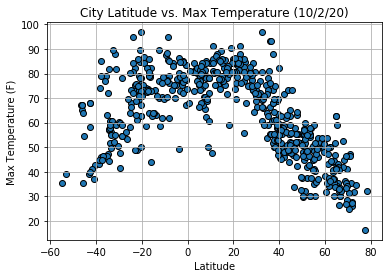

In [8]:
x = city_data_df['Lat']
y_1 = city_data_df['Max Temp']

plt.scatter(x, y_1, edgecolors = 'black')
plt.grid(axis = 'both')
plt.title('City Latitude vs. Max Temperature (10/2/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

#Save and Show Figure
plt.savefig('lat_vs_max_temp.png')

## Latitude vs. Humidity Plot

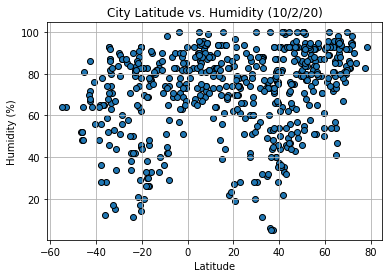

In [9]:
y_2 = city_data_df['Humidity']

plt.scatter(x, y_2, edgecolors = 'black')
plt.grid(axis = 'both')
plt.title('City Latitude vs. Humidity (10/2/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

#Save and Show Figure
plt.savefig('lat_vs_humidity.png')

## Latitude vs. Cloudiness Plot

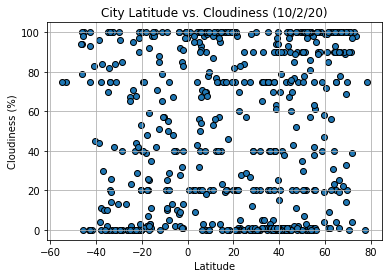

In [10]:
y_3 = city_data_df['Cloudiness']

plt.scatter(x, y_3, edgecolors = 'black')
plt.grid(axis = 'both')
plt.title('City Latitude vs. Cloudiness (10/2/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

#Save and Show Figure
plt.savefig('lat_vs_cloudiness.png')

## Latitude vs. Wind Speed Plot

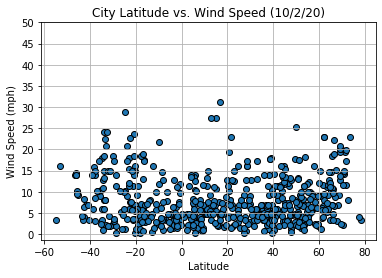

In [11]:
y_4 = city_data_df['Wind Speed']

plt.scatter(x, y_4, edgecolors = 'black')
plt.grid(axis = 'both')
plt.title('City Latitude vs. Wind Speed (10/2/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.yticks(np.arange(0, 55, 5))

#Save and Show Figure
plt.savefig('lat_vs_wind_speed.png')

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots

In [13]:
# Create Northern and Southern Hemisphere DataFrames
north = city_data_df.loc[city_data_df['Lat'] >= 0]
south = city_data_df.loc[city_data_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.839


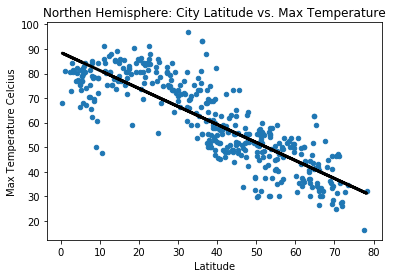

In [14]:
linear_regression = linregress(north['Lat'], north['Max Temp'])
linear_equation = linear_regression[0] * north['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
north.plot.scatter(
    x = 'Lat',
    y = 'Max Temp',)

plt.plot(
    north['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Northen Hemisphere: City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature Celcius')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.581


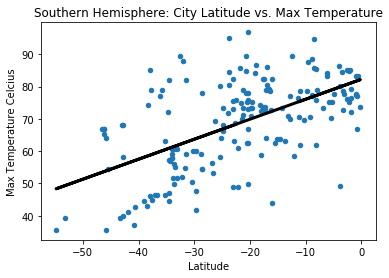

In [15]:
linear_regression = linregress(south['Lat'], south['Max Temp'])
linear_equation = linear_regression[0] * south['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
south.plot.scatter(
    x = 'Lat',
    y = 'Max Temp',)
    

plt.plot(
    south['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Southern Hemisphere: City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature Celcius')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.098


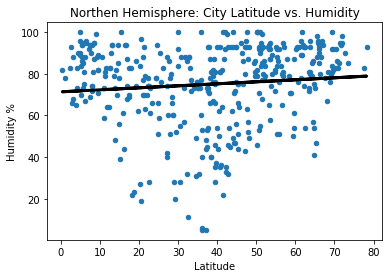

In [16]:
linear_regression = linregress(north['Lat'], north['Humidity'])
linear_equation = linear_regression[0] * north['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
north.plot.scatter(
    x = 'Lat',
    y = 'Humidity',)

plt.plot(
    north['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Northen Hemisphere: City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.154


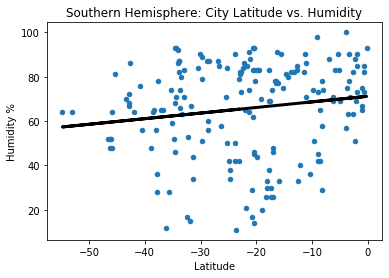

In [17]:
linear_regression = linregress(south['Lat'], south['Humidity'])
linear_equation = linear_regression[0] * south['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
south.plot.scatter(
    x = 'Lat',
    y = 'Humidity',)

plt.plot(
    south['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Southern Hemisphere: City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.11


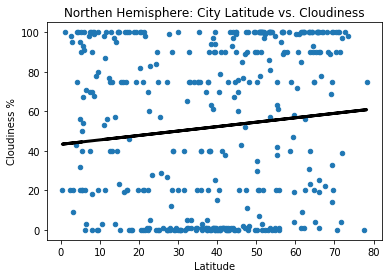

In [18]:
linear_regression = linregress(north['Lat'], north['Cloudiness'])
linear_equation = linear_regression[0] * north['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
north.plot.scatter(
    x = 'Lat',
    y = 'Cloudiness',)

plt.plot(
    north['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Northen Hemisphere: City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.023


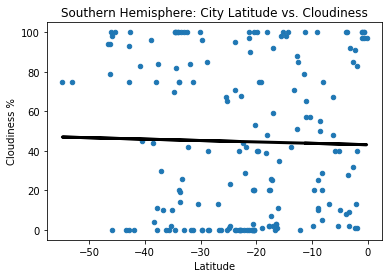

In [19]:
linear_regression = linregress(south['Lat'], south['Cloudiness'])
linear_equation = linear_regression[0] * south['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
south.plot.scatter(
    x = 'Lat',
    y = 'Cloudiness',)

plt.plot(
    south['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Southern Hemisphere: City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.215


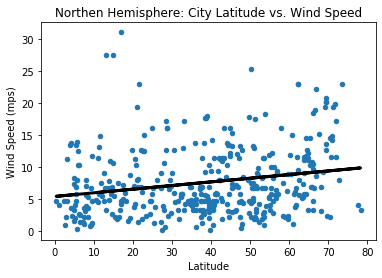

In [20]:

linear_regression = linregress(north['Lat'], north['Wind Speed'])
linear_equation = linear_regression[0] * north['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
north.plot.scatter(
    x = 'Lat',
    y = 'Wind Speed',)
plt.plot(
    north['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')
plt.title('Northen Hemisphere: City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mps)')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.263


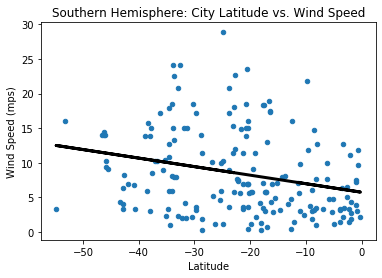

In [21]:
linear_regression = linregress(south['Lat'], south['Wind Speed'])
linear_equation = linear_regression[0] * south['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
south.plot.scatter(
    x = 'Lat',
    y = 'Wind Speed',)
plt.plot(
    south['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')
plt.title('Southern Hemisphere: City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mps)')
plt.show()